In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [302]:
df = pd.read_csv("../../data/movies.csv")
df.head()

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross
0,Blood Red Sky,(2021),"\r\nAction, Horror, Thriller",6.1,\r\nA woman with a mysterious illness is force...,\r\n Director:\r\nPeter Thorwarth\r\n| \r\n...,"21,062",121.0,NaN
1,Masters of the Universe: Revelation,(2021– ),"\r\nAnimation, Action, Adventure",5.0,\r\nThe war for Eternia begins again in what m...,"\r\n \r\n Stars:\r\nChris Wood, ...","17,870",25.0,NaN
2,The Walking Dead,(2010–2022),"\r\nDrama, Horror, Thriller",8.2,\r\nSheriff Deputy Rick Grimes wakes up from a...,\r\n \r\n Stars:\r\nAndrew Linco...,"885,805",44.0,NaN
3,Rick and Morty,(2013– ),"\r\nAnimation, Adventure, Comedy",9.2,\r\nAn animated series that follows the exploi...,\r\n \r\n Stars:\r\nJustin Roila...,"414,849",23.0,NaN
4,Army of Thieves,(2021),"\r\nAction, Crime, Horror",NaN,"\r\nA prequel, set before the events of Army o...",\r\n Director:\r\nMatthias Schweighöfer\r\n...,NaN,NaN,NaN


In [248]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   MOVIES    9999 non-null   object 
 1   YEAR      9355 non-null   object 
 2   GENRE     9919 non-null   object 
 3   RATING    8179 non-null   float64
 4   ONE-LINE  9999 non-null   object 
 5   STARS     9999 non-null   object 
 6   VOTES     8179 non-null   object 
 7   RunTime   7041 non-null   float64
 8   Gross     460 non-null    object 
dtypes: float64(2), object(7)
memory usage: 703.2+ KB


In [249]:
import missingno as msno # pip install missingno (Il faut installer le package dans l'environnement python)


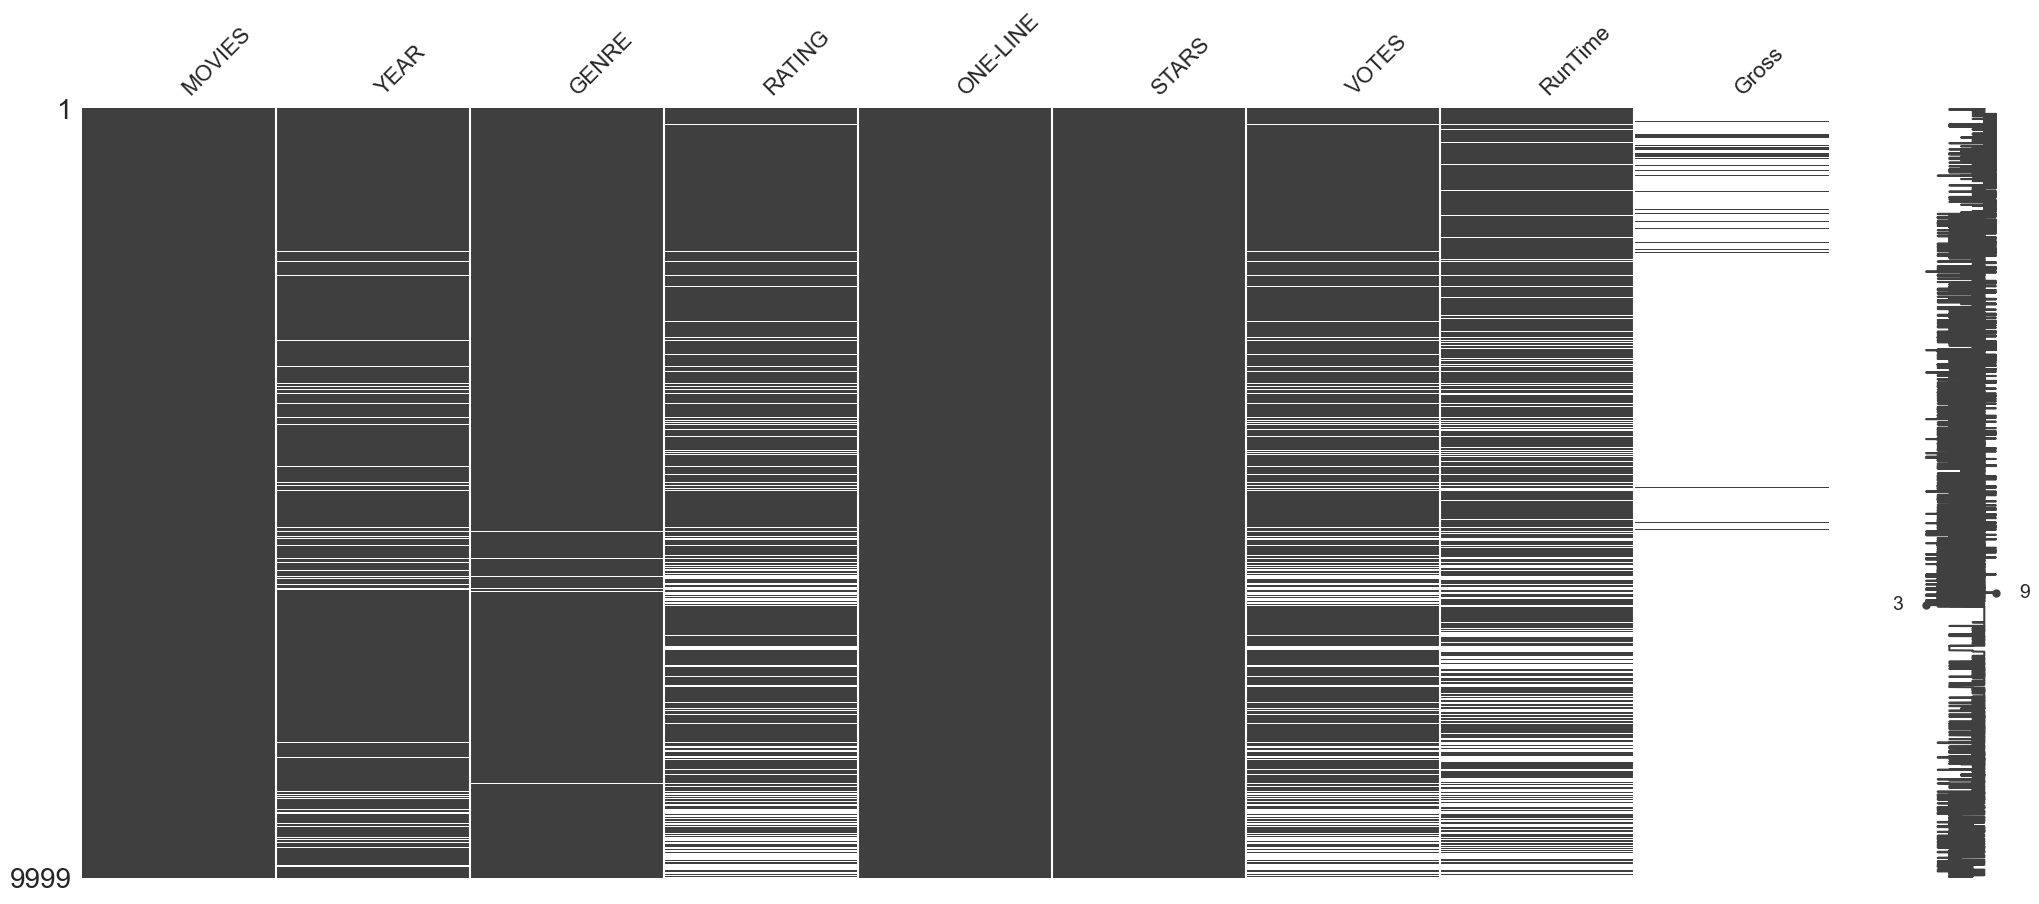

<Figure size 1500x900 with 0 Axes>

In [250]:
msno.matrix(df)
plt.figure(figsize = (15,9))
plt.show()

<Axes: >

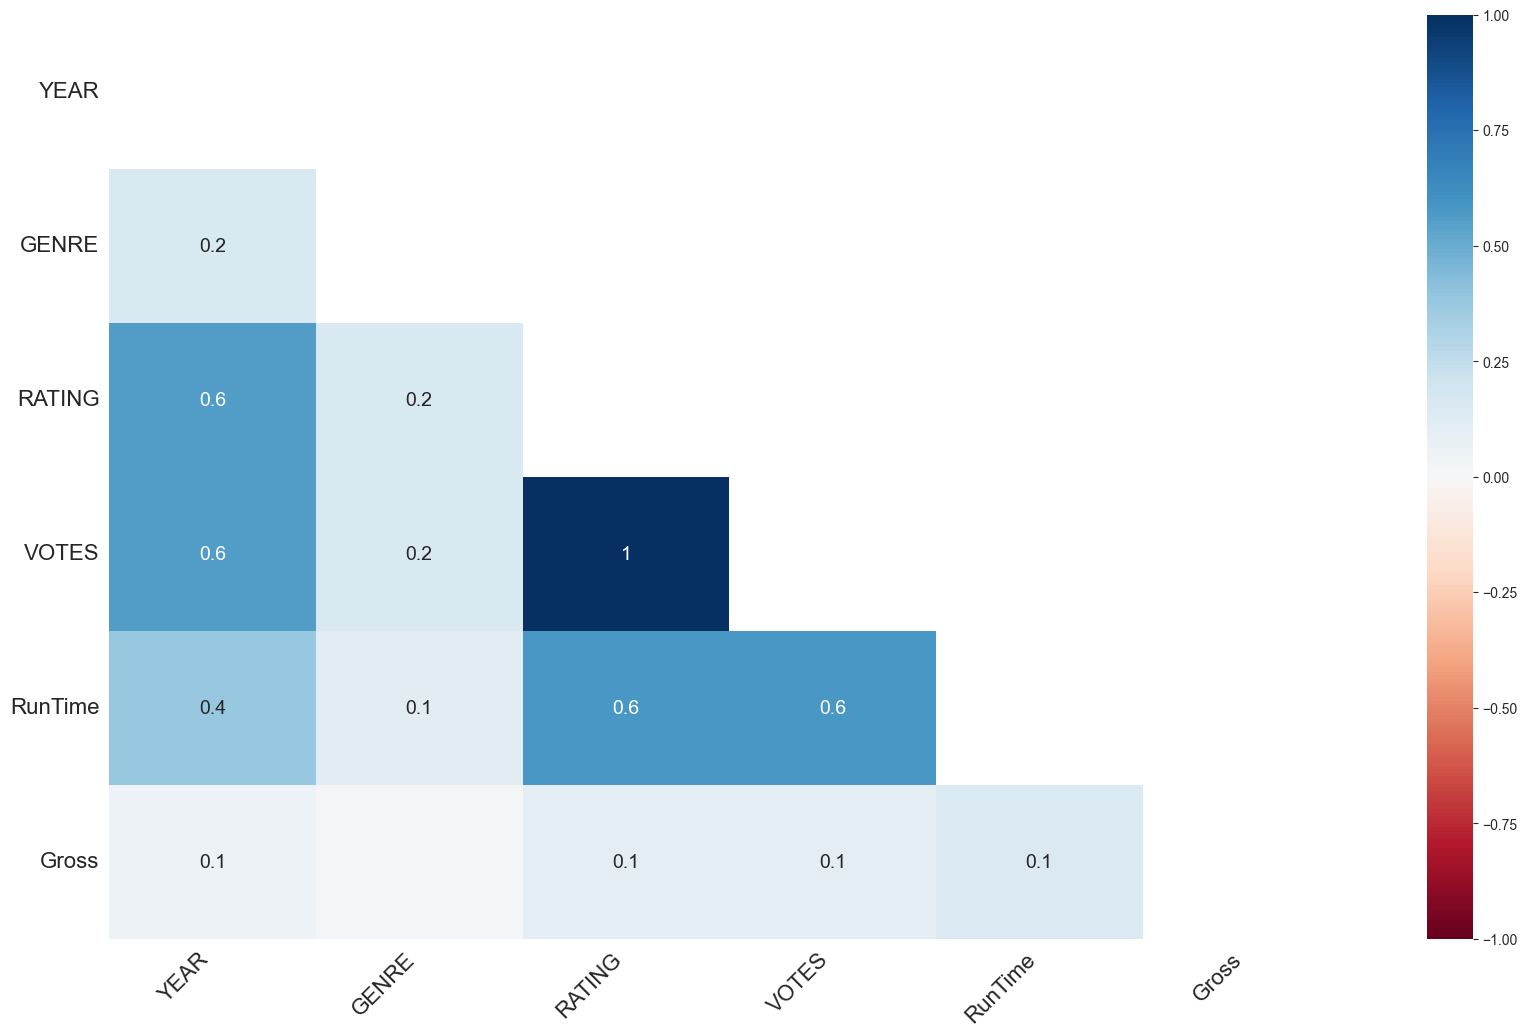

In [251]:
msno.heatmap(df, labels = True)

<Axes: >

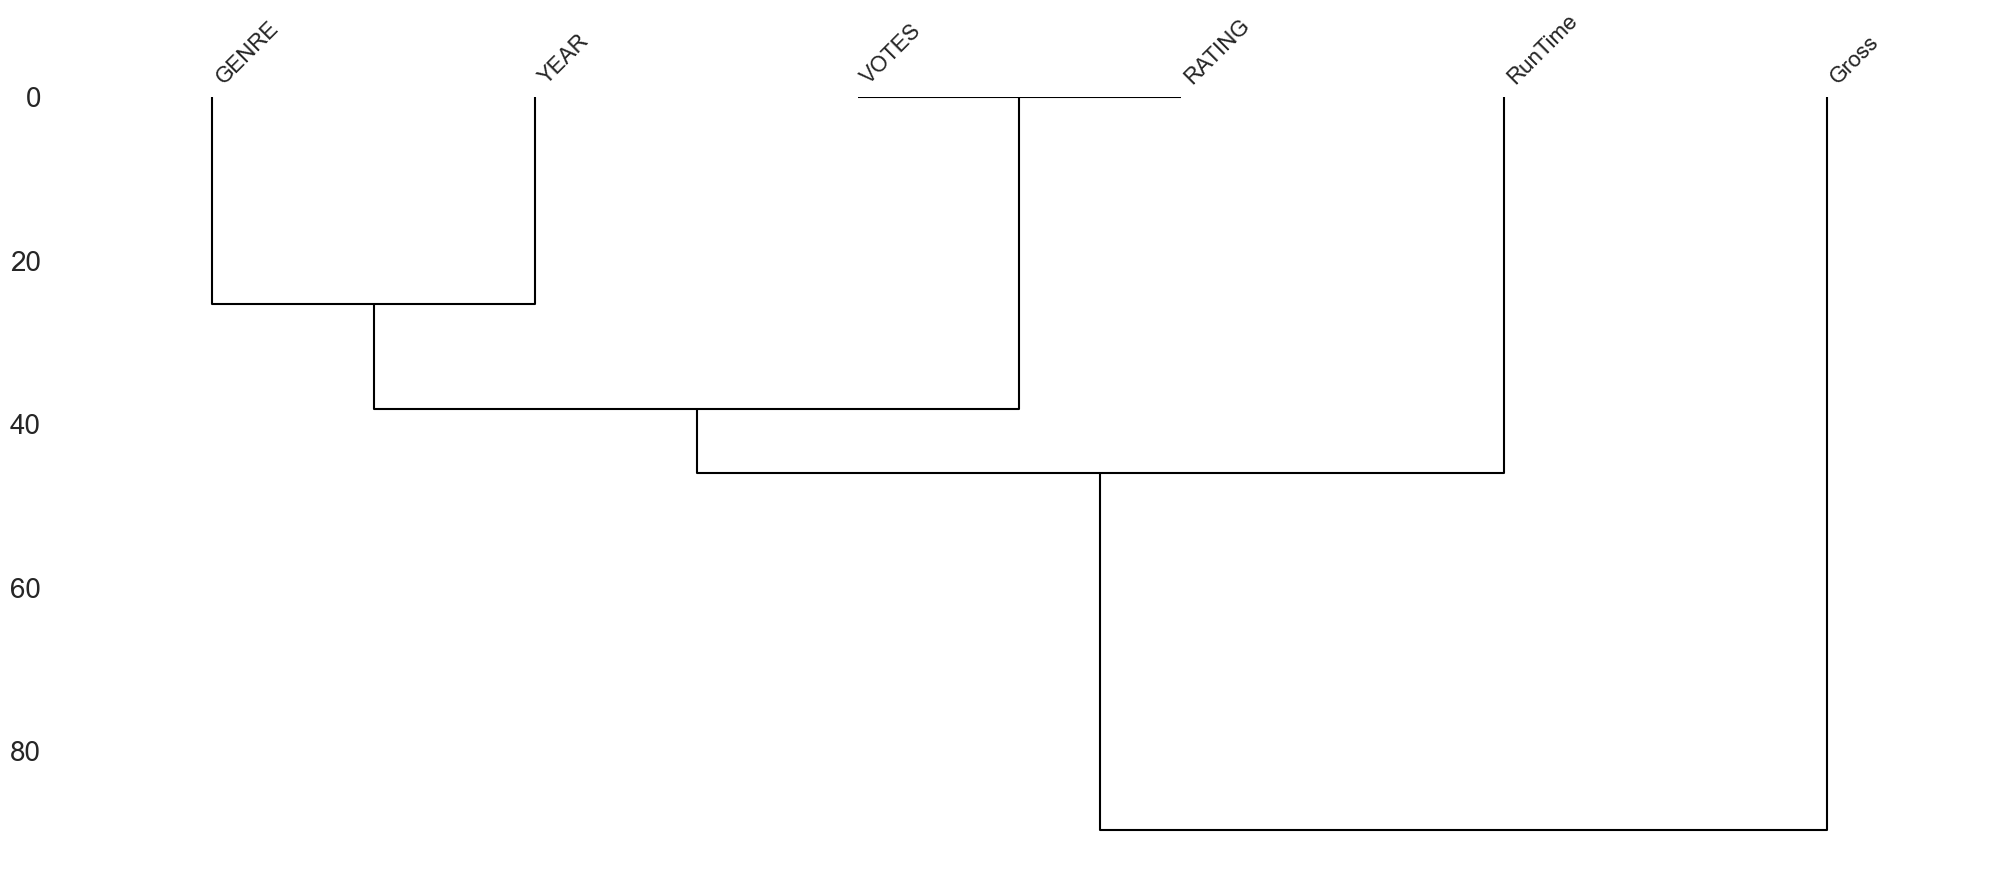

In [221]:
# Columns having missing values
missing_value_columns = [col for col in df.columns if df[col].isnull().sum() > 0]
msno.dendrogram(df[missing_value_columns])

In [303]:
def get_numerical_summary(df):
    total = df.shape[0]
    missing_values_columns = [col for col in df.columns if df[col].isnull().sum() > 0]
    missing_values_percent = {}
    for col in missing_values_columns:
        null_count = df[col].isnull().sum()
        per = (null_count/total) * 100
        missing_values_percent[col] = per
        print("{} : {} ({}%)".format(col, null_count, round(per, 3)))
    return missing_values_percent

### Analyse des données d'origine ###

la collonne Gross n'est present que sur 4,6 % des lignes. Nous pouvons la supprimer car elle n'est pas exploitable.

Seulement 80 lignes n'ont pas de valeur pour le genre. Nous pouvons supprimer ces lignes sans perdre trop de données.

In [307]:
missing_percent = get_numerical_summary(df)

YEAR : 644 (6.441%)
GENRE : 80 (0.8%)
RATING : 1820 (18.202%)
VOTES : 1820 (18.202%)
RunTime : 2958 (29.583%)


In [305]:
# Seuil pour supprimer l'attribut dont les valeurs manquantes sont supérieures au seuil (gross dans notre cas).
ATTRIBUTE_THRESHOLD = 90 #25% in this case 

for col, per in missing_percent.items():
    if per > ATTRIBUTE_THRESHOLD:
        df.drop(col, axis = 1, inplace = True)

In [306]:
def get_missing_values(df):
    null_count = 0
    for col in df.columns:
        null_count += df[col].isnull().sum()
    return null_count

get_missing_values(df)

np.int64(7322)

In [308]:
df_temp = df.copy()

In [309]:
missing_percent = get_numerical_summary(df_temp)

YEAR : 644 (6.441%)
GENRE : 80 (0.8%)
RATING : 1820 (18.202%)
VOTES : 1820 (18.202%)
RunTime : 2958 (29.583%)


In [310]:
missing_percent = get_numerical_summary(df_temp)

YEAR : 644 (6.441%)
GENRE : 80 (0.8%)
RATING : 1820 (18.202%)
VOTES : 1820 (18.202%)
RunTime : 2958 (29.583%)


In [311]:
# Obtenir le nombre de manquants pour chaque échantillon            

for idx in range(df_temp.shape[0]):
    df_temp.loc[idx, 'missing_count'] = df_temp.iloc[idx, :].isnull().sum() 

In [312]:
# Seuil pour supprimer les échantillons dont les valeurs manquantes sont supérieures au seuil.
SAMPLE_THRESHOLD = 4

print("Samples Before Removal : {}".format(df_temp.shape[0]))

df_temp.drop(df_temp[df_temp['missing_count'] > SAMPLE_THRESHOLD].index, axis = 0, inplace = True)

print("Samples After Removal : {}".format(df_temp.shape[0]))

Samples Before Removal : 9999
Samples After Removal : 9355


In [313]:
missing_percent = get_numerical_summary(df_temp)

YEAR : 27 (0.289%)
GENRE : 12 (0.128%)
RATING : 1176 (12.571%)
VOTES : 1176 (12.571%)
RunTime : 2315 (24.746%)


In [314]:
# Seuil pour supprimer les échantillons dont les valeurs manquantes sont supérieures au seuil.
SAMPLE_THRESHOLD = 3

print("Samples Before Removal : {}".format(df_temp.shape[0]))

df_temp.drop(df_temp[df_temp['missing_count'] > SAMPLE_THRESHOLD].index, axis = 0, inplace = True)

print("Samples After Removal : {}".format(df_temp.shape[0]))

Samples Before Removal : 9355
Samples After Removal : 8405


In [315]:
missing_percent = get_numerical_summary(df_temp)


GENRE : 11 (0.131%)
RATING : 226 (2.689%)
VOTES : 226 (2.689%)
RunTime : 1393 (16.573%)


In [267]:
# Obtenir le nombre de manquants pour chaque échantillon            

for idx in range(df.shape[0]):
    df.loc[idx, 'missing_count'] = df.iloc[idx, :].isnull().sum() 

In [268]:
SAMPLE_THRESHOLD = 4

print("Samples Before Removal : {}".format(df_temp.shape[0]))

df.drop(df[df['missing_count'] > SAMPLE_THRESHOLD].index, axis = 0, inplace = True)

print("Samples After Removal : {}".format(df.shape[0]))

Samples Before Removal : 8474
Samples After Removal : 9423


In [269]:
df = df.dropna(subset=['GENRE','YEAR'])

In [270]:
df.shape[0]

8837

In [271]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8837 entries, 0 to 9998
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MOVIES         8837 non-null   object 
 1   YEAR           8837 non-null   object 
 2   GENRE          8837 non-null   object 
 3   RATING         7771 non-null   float64
 4   ONE-LINE       8837 non-null   object 
 5   STARS          8837 non-null   object 
 6   VOTES          7771 non-null   object 
 7   RunTime        6664 non-null   float64
 8   missing_count  8757 non-null   float64
dtypes: float64(3), object(6)
memory usage: 690.4+ KB


In [272]:
missing_percent = get_numerical_summary(df)

RATING : 1066 (12.063%)
VOTES : 1066 (12.063%)
RunTime : 2173 (24.59%)
missing_count : 80 (0.905%)
